# COVID-19 Dashboard - NHS Region (London)
### Summary of hospital cases, new admissions, transmission rate growth rate Max and Min

Collection of data from the latest release date, showing tables and graphs of the latest information collected across the NHS Region (London) on new hospital cases, new admissions, and minimum/maximum transmission rate growth rate. 

Data was collected from the [NHS Region](https://coronavirus.data.gov.uk/details/download), extracted data on the 27th of October 2021.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
# an iPython  "magic" that enables the embedding of matplotlib output
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 120

##  Loading of Data

In [3]:
with open("nhsRegion_2021-10-26.json", "rt") as INFILE:
    data=json.load(INFILE)

In [4]:
datalist=data['body']
# datalist

In [5]:
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
# dates

In [6]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [38]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
#print (startdate, ' to ', enddate)

### Loading the data into timeseries data frame

In [8]:
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin'])
timeseriesdf.head(10)

,hospitalCases,newAdmissions,transmissionRateGrowthRateMax,transmissionRateGrowthRateMin
2020-03-19,NaN,NaN,NaN,NaN
2020-03-20,NaN,NaN,NaN,NaN
2020-03-21,NaN,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN,NaN
2020-03-23,NaN,NaN,NaN,NaN
2020-03-24,NaN,NaN,NaN,NaN
2020-03-25,NaN,NaN,NaN,NaN
2020-03-26,NaN,NaN,NaN,NaN
2020-03-27,NaN,NaN,NaN,NaN
2020-03-28,NaN,NaN,NaN,NaN


## Adding our json data file into the timeseries data frame
    
    
Shows the first and last 10 release dates of data presenting the hospital cases, new admissions, and max/min trasnmission rate growth rate.

In [9]:
for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
    date=parse_date(entry['date'])
    for column in ['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
        if pd.isna(timeseriesdf.loc[date, column]): 
            # replace None with 0 in our data 
            value= float(entry[column]) if entry[column]!=None else 0.0
            # this is the way you access a specific location in the dataframe - use .loc
            # and put index,column in a single set of [ ]
            timeseriesdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
timeseriesdf.fillna(0.0, inplace=True)
            
timeserieslimited1 = timeseriesdf.head(10)
timeserieslimited2 = timeseriesdf.tail(10)

frames = [timeserieslimited1, timeserieslimited2]

result = pd.concat(frames)
result_clean = pd.DataFrame(result)
result_clean

,hospitalCases,newAdmissions,transmissionRateGrowthRateMax,transmissionRateGrowthRateMin
2020-03-19,0.0,240.0,0.0,0.0
2020-03-20,841.0,272.0,0.0,0.0
2020-03-21,1081.0,311.0,0.0,0.0
2020-03-22,1266.0,335.0,0.0,0.0
2020-03-23,1559.0,505.0,0.0,0.0
2020-03-24,1705.0,637.0,0.0,0.0
2020-03-25,2051.0,675.0,0.0,0.0
2020-03-26,2244.0,519.0,0.0,0.0
2020-03-27,2829.0,639.0,0.0,0.0
2020-03-28,3114.0,551.0,0.0,0.0


## Plotting our data onto graphs


The graph shown below 

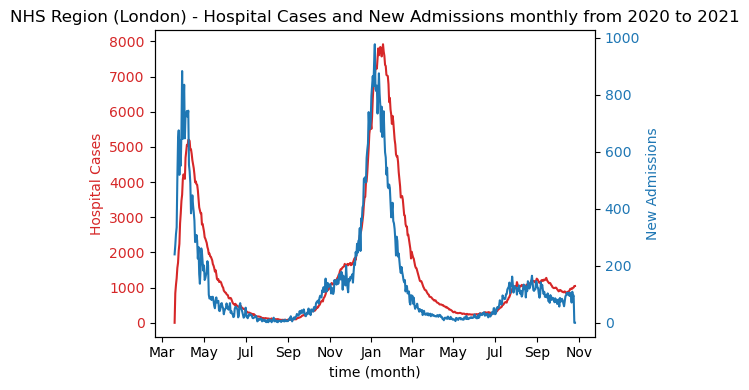

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

a = timeseriesdf['hospitalCases']
b = timeseriesdf['newAdmissions']
                

fig, ax1 = plt.subplots()

plt.title('NHS Region (London) - Hospital Cases and New Admissions monthly from 2020 to 2021')

color = 'tab:red'
ax1.set_xlabel('time (month)')
ax1.set_ylabel('Hospital Cases', color=color)
ax1.plot(a, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New Admissions', color=color)  # we already handled the x-label with ax1
ax2.plot(b, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

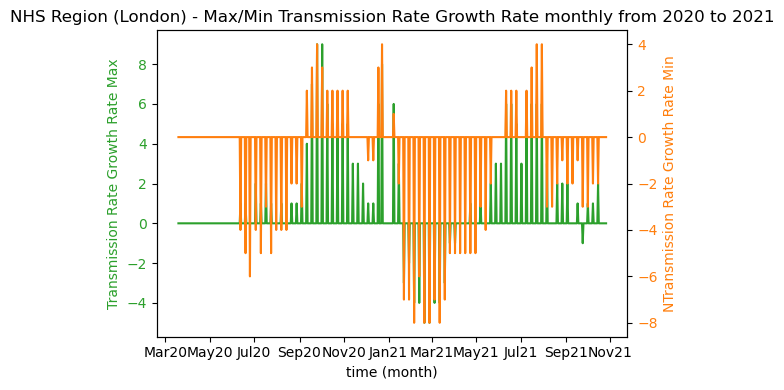

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

a = timeseriesdf['transmissionRateGrowthRateMax']
b = timeseriesdf['transmissionRateGrowthRateMin']
                

fig, ax1 = plt.subplots()

plt.title('NHS Region (London) - Max/Min Transmission Rate Growth Rate monthly from 2020 to 2021')

color = 'tab:green'
ax1.set_xlabel('time (month)')
ax1.set_ylabel('Transmission Rate Growth Rate Max', color=color)
ax1.plot(a, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('NTransmission Rate Growth Rate Min', color=color)  # we already handled the x-label with ax1
ax2.plot(b, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<AxesSubplot:>

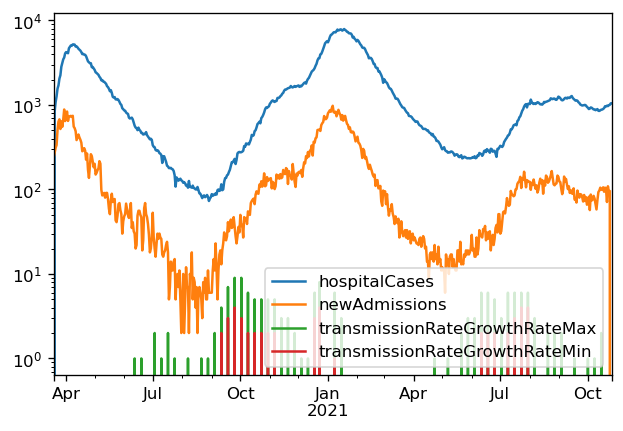

In [12]:
timeseriesdf.plot(logy=True) # ...lemon squeezy

# Interactive Graphs

## Conversion of our data into a pickle

In [13]:
timeseriesdf.to_pickle("timeseriesdf.pkl")

In [14]:
#datadic=data['body'] # data['data'] is a list
#datadic

In [15]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [17]:
# our API access function. This will be called by the button when it is clicked
def access_api(button):
    # Ignore the button parameter
    #
    # put code for polling the API here
    #
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again.
    apibutton.icon="check"
    apibutton.disabled=True

# see the doc for the parameters    
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download' # (FontAwesome names without the `fa-` prefix)
)

# register the callback function with the button
apibutton.on_click(access_api)

# this is an iPython function that generalises print for Jupyter Notebooks; we use it to 
# display the widgets
display(apibutton)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

## Reading our data from pickle file

Presenting both individual plots and joint plots of hospital cases, new admissions, max/min transmission rate growth rate monthly from 2020-2021

In [18]:
timeseriesdf=pd.read_pickle("timeseriesdf.pkl")

In [37]:
series=wdg.SelectMultiple(
    options=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin'],
    value=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin'],
    rows=3,
    description='Plot of:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Scales:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

In the graph shown above you are able to choose the different scales you want it as linear/logarithmic. As well as being able to select multiple plots so they can be shown on the same graph.

## Dropdown interactive graph together with configuration button

In [20]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [21]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [22]:
# jsondata={}

In [23]:
with open("nhsRegion_2021-10-26.json", "rt") as INFILE:
    jsondata=json.load(INFILE)

In [24]:
def wrangle_data(rawdata):
    """ Parameters: rawdata - data from json file or API call. Returns a dataframe.
    Edit to include the code that wrangles the data, creates the dataframe and fills it in. """
   
    datalist=rawdata['body']
    
    index=pd.date_range(startdate, enddate, freq='D')
    timeseriesdf=pd.DataFrame(index=index, columns=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin'])
    
    
    for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
        date=parse_date(entry['date'])
        for column in ['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
            if pd.isna(timeseriesdf.loc[date, column]): 
            # replace None with 0 in our data 
                value= float(entry[column]) if entry[column]!=None else 0.0
            # this is the way you access a specific location in the dataframe - use .loc
            # and put index,column in a single set of [ ]
                timeseriesdf.loc[date, column]=value
            
# fill in any remaining "holes" due to missing dates
    timeseriesdf.fillna(0.0, inplace=True)
    return timeseriesdf        

# putting the wrangling code into a function allows you to call it again after refreshing the data through 
# the API. You should call the function directly on the JSON data when the dashboard starts, by including 
# the call in the cell as below:
df=wrangle_data(jsondata) # df is the dataframe for plotting

In [25]:
def access_api():
    """ Accesses the PHE API. Returns raw data in the same format as data loaded from the "canned" JSON file. """
    return {} # return data read from the API

In [34]:
def api_button_callback(button):
    """ Button callback - it must take the button as its parameter (unused in this case).
    Accesses API, wrangles data, updates global variable df used for plotting. """
    # Get fresh data from the API. If you have time, include some error handling
    # around this call.
    apidata=access_api()
    # wrangle the data and overwrite the dataframe for plotting
    global df
    df=wrangle_data(apidata)
    # the graph won't refresh until the user interacts with the widget.
    # this function simulates the interaction, see Graph and Analysis below.
    # you can omit this step in the first instance
    refresh_graph()
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again. You can use icons
    # "unlink" or "times" and change the button text to "Unavailable" in case the 
    # api call fails.
    apibutton.icon="check"
    # apibutton.disabled=True

    
apibutton=wdg.Button(
    description='Refresh Button', # you may want to change this...
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Keep calm and carry on",
    # FontAwesome names without the `fa-` prefix - try "download"
    icon='download'
)

# remember to register your button callback function with the button
apibutton.on_click(api_button_callback) # the name of your function inside these brackets

display(apibutton)

# run all cells before clicking on this button

Button(button_style='info', description='Refresh Button', icon='download', style=ButtonStyle(), tooltip='Keep …

#### Interactive graphs

Presents 4 individual interactive graphs for each metrics selected (Hospital Cases, New Admissions, Max/Min Transmission Rate Growth Rate) at the start fo the overview when the data was downloaded. 

In [27]:
def plot_random_walk(walk):
    df[walk].plot()
    plt.show() # important! update won't work properly without this
    
whichwalk=wdg.Dropdown(
    options=['hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', 'transmissionRateGrowthRateMin'],
    value='hospitalCases',
    description='Walk no: ',
    disabled=False,
)

def refresh_graph():
    """ We change the value of the widget in order to force a redraw of the graph;
    this is useful when the data have been updated. This is a bit of a gimmick; it
    needs to be customised for one of your widgets. """
    current=whichwalk.value
    if current==whichwalk.options[0]:
        other=whichwalk.options[1]
    else:
        other=whichwalk.options[0]
    whichwalk.value=other # forces the redraw
    whichwalk.value=current # now we can change it back
    
    
graph=wdg.interactive_output(plot_random_walk, {'walk': whichwalk})
    
display(whichwalk, graph)

Dropdown(description='Walk no: ', options=('hospitalCases', 'newAdmissions', 'transmissionRateGrowthRateMax', …

Output()